<a href="https://colab.research.google.com/github/leakydishes/Fairness_feedback_nlp_test/blob/main/Phase2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Deakin University Internship 2023**
##*Phase 2,* Part 1 DistilBERT Model, RoBERTA and DualModel

###### In Phase 2, SemCom is developed to minimize semantic errors and optimize transmission efficiency. Extending the findings of Phase 1, we assess different models including DistilBERT, untrained/trained RoBERTa, and the custom DualModel. The focus is on exploring semantic relationships using the trained RoBERTa model. Implementation involves a fusion of neural networks and physical channel simulations, necessitating a thorough data pre-processing. In Phase 2, we embark on two pivotal endeavours. Phase 2 Part 1 kicks off with an extensive exploration of the DistilBERT model and tokenizer, meticulously preparing the text attribute (comment text). This entails precise tokenization and sequence truncation to seamlessly integrate with the library's maximum input length.  <br>

##**Step 1. Mount Google Drive and install dependencies**

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
#permanently install the specific version to the google colab
!sudo apt install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-setuptools python3-wheel
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  python3-pip python3-setuptools python3-wheel
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 1,677 kB of archives.
After this operation, 8,965 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-setuptools all 59.6.0-1.2ubuntu0.22.04.1 [339 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-wheel all 0.37.1-2ubuntu0.22.04.1 [32.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 python3-pip all 22.0.2+dfsg-1ubuntu0.3 [1,305 kB]
Fetched 1,677 kB in 1s (1,962 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog

In [ ]:
#Install correct packages
!sudo apt-get install python3.8-distutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.8-lib2to3
The following NEW packages will be installed:
  python3.8-distutils python3.8-lib2to3
0 upgraded, 2 newly installed, 0 to remove and 19 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,237 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-lib2to3 all 3.8.18-1+jammy1 [126 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-distutils all 3.8.18-1+jammy1 [193 kB]
Fetched 319 kB in 0s (1,441 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize fron

In [ ]:
%cd /content/drive/MyDrive/fairness-feedback-nlp/Code
!pip install -r requirements.txt

/content/drive/MyDrive/fairness-feedback-nlp/Code
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 110.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.6 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.6.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.

In [ ]:
!pip install w3lib
!pip install scikit-learn
!pip install bert4keras==0.4.6

  Preparing metadata (setup.py) ... done
  Created wheel for bert4keras: filename=bert4keras-0.4.6-py3-none-any.whl size=25730 sha256=80d4069c961d77ed121c0fe5f51eb707588256c0af95478d8fe6e62b08fce7f0
  Stored in directory: /root/.cache/pip/wheels/51/fc/07/4449a78fc8f7f4b180d61743700801b649f56b936fee265947
Successfully built bert4keras


### Install Transformers and libraries

In [ ]:
!pip install accelerate>=0.20.3 transformers
!pip install datasets
!pip install evaluate
!pip install datasets transformers huggingface_hub
!apt-get install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


##**Step 2. Preprocessing data**

*   Reduce size of dataset (train_preprocessed) for testing
*   Sentences are in a suitable format for tokenization



In [ ]:
import pandas as pd
import random
original_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed.csv" # Original CSV file
reduced_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_twenty.csv" # Reduced dataset
df = pd.read_csv(original_csv_path) # Load original data
df = df.sample(frac=1, random_state=42) # Shuffle data
reduced_size = len(df) // 20 # 1/20 reduction data
reduced_df = df[:reduced_size] #take 1/20 data
reduced_df.to_csv(reduced_csv_path, index=False) # Save reduced data

In [ ]:
import pandas as pd
# Testing different data sizes
original_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed.csv"
reduced_one_third_csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced.csv"
reduced_one_sixth__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_sixth.csv"
reduced_one_twenty__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_twenty.csv"
reduced_one_fifty__csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"

# Load the CSV data using pandas
df_original = pd.read_csv(original_csv_path)
df_reduced1 = pd.read_csv(reduced_one_third_csv_path)
df_reduced2 = pd.read_csv(reduced_one_sixth__csv_path)
df_reduced3 = pd.read_csv(reduced_one_twenty__csv_path)
df_reduced4 = pd.read_csv(reduced_one_fifty__csv_path)

# Get the number of items in each CSV
num_items_original = len(df_original)
num_items_reduced1 = len(df_reduced1)
num_items_reduced2 = len(df_reduced2)
num_items_reduced3 = len(df_reduced3)
num_items_reduced4 = len(df_reduced4)

# Print the number of items
print("Number of items in the original CSV:", num_items_original)
print("Number of items in the reduced CSV 1/3:", num_items_reduced1)
print("Number of items in the reduced CSV 1/6:", num_items_reduced2)
print("Number of items in the reduced CSV 1/20:", num_items_reduced3)
print("Number of items in the reduced CSV 1/50:", num_items_reduced4)

Number of items in the original CSV: 1804874
Number of items in the reduced CSV 1/3: 601624
Number of items in the reduced CSV 1/6: 300812
Number of items in the reduced CSV 1/20: 90243
Number of items in the reduced CSV 1/50: 36097


In [ ]:
csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"
df = pd.read_csv(csv_path)
print(df.head()) # Display first few rows of df

   Unnamed: 0       id    target  \
0      286892   593336  0.166667   
1      419218   756192  0.600000   
2     1055330  5407051  0.000000   
3     1382764  5808132  0.000000   
4      256049   557013  0.000000   

                                        comment_text  severe_toxicity  \
0  What a breathe of fresh air to have someone wh...              0.0   
1  Your jewish friends were the ones who told you...              0.2   
2  Possible collusion by Trump and his affiliates...              0.0   
3  Exactly.  We need a % of GDP spending cap at t...              0.0   
4  By your own comment, even if some of them vote...              0.0   

   obscene  identity_attack    insult  threat  asian  ...  article_id  \
0      0.0              0.0  0.166667     0.0    NaN  ...      151356   
1      0.0              0.6  0.400000     0.0    0.0  ...      158493   
2      0.0              0.0  0.000000     0.0    NaN  ...      343435   
3      0.0              0.0  0.000000     0.0    NaN

##**Step 3. Reduce Dataset for Testing**
### Dataset for 1/50 of CSV data for small and medium dataset model testing

In [ ]:
import pandas as pd
from datasets import Dataset
import matplotlib.pyplot as plt
csv_path = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv" # Load CSV
df = pd.read_csv(csv_path)
df = pd.read_csv(csv_path)
df["label"] = df["target"].apply(lambda x: 1 if x > 0.1 else 0)
selected_columns = ["comment_text", "label"]
df = df[selected_columns]

# Columns dict/ combine
data_dict = {"comment_text": df["comment_text"].tolist(), "label": df["label"].tolist()}
# Create a Hugging Face dataset
dataset = Dataset.from_dict(data_dict)
dataset.save_to_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary") # Save the dataset
loaded_dataset = Dataset.load_from_disk("/content/drive/MyDrive/fairness-feedback-nlp/Code/Dataset_Dictionary") # Load the dataset
print(loaded_dataset)
df = loaded_dataset.select(range(5)).to_pandas()
print(df.head())

Saving the dataset (0/1 shards):   0%|          | 0/36097 [00:00<?, ? examples/s]

Dataset({
    features: ['comment_text', 'label'],
    num_rows: 36097
})
                                        comment_text  label
0  What a breathe of fresh air to have someone wh...      1
1  Your jewish friends were the ones who told you...      1
2  Possible collusion by Trump and his affiliates...      0
3  Exactly.  We need a % of GDP spending cap at t...      0
4  By your own comment, even if some of them vote...      0


In [ ]:
print(loaded_dataset.shape) #data points and columns

(36097, 2)


##**Step 4. Explore the data - Visualisation**

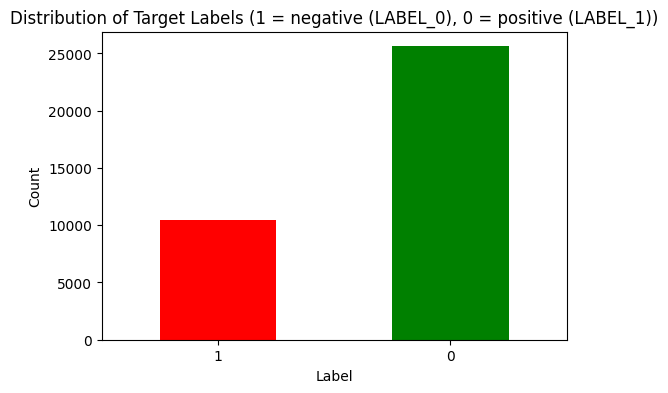

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import Dataset
from collections import Counter

# Count occurrences label in data
label_counts = Counter(loaded_dataset['label'])

# Convert counts
label_counts_series = pd.Series(label_counts)

# Bar plot visualize distribution of labels
plt.figure(figsize=(6, 4))
label_counts_series.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Target Labels (1 = negative (LABEL_0), 0 = positive (LABEL_1))')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

##**Step 4. Split Dataset for Training and Testing**

*   Split original dataset to size 1/50
*   Train, test and valid columns



In [ ]:
#https://huggingface.co/blog/sentiment-analysis-python
from sklearn.model_selection import train_test_split
from datasets import load_dataset, DatasetDict

# 90% train, 10% test + validation
train_testvalid = loaded_dataset.train_test_split(test_size=0.1, shuffle=True, seed=42)

# Split the 10% test + valid in half test, half valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)

# Single data dict
train_test_valid_dataset = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']
})

print(train_test_valid_dataset)

DatasetDict({
    train: Dataset({
        features: ['comment_text', 'label'],
        num_rows: 32487
    })
    test: Dataset({
        features: ['comment_text', 'label'],
        num_rows: 1805
    })
    valid: Dataset({
        features: ['comment_text', 'label'],
        num_rows: 1805
    })
})


In [ ]:
# Small testing dataset
small_train_dataset = train_test_valid_dataset["train"].shuffle(seed=42).select([i for i in list(range(3000))])
small_test_dataset = train_test_valid_dataset["test"].shuffle(seed=42).select([i for i in list(range(300))]) # 10% of data to test

# Med testing dataset
med_train_dataset = train_test_valid_dataset["train"].shuffle(seed=42).select([i for i in list(range(18000))])
med_test_dataset = train_test_valid_dataset["test"].shuffle(seed=42).select([i for i in list(range(1800))]) # 10% of data to test

In [ ]:
print(f"small_train_dataset: {small_train_dataset}")
print(f"small_test_dataset: {small_test_dataset}")

small_train_dataset: Dataset({
    features: ['comment_text', 'label'],
    num_rows: 3000
})
small_test_dataset: Dataset({
    features: ['comment_text', 'label'],
    num_rows: 300
})


In [ ]:
print(f"med_train_dataset: {med_train_dataset}")
print(f"med_test_dataset: {med_test_dataset}")

med_train_dataset: Dataset({
    features: ['comment_text', 'label'],
    num_rows: 18000
})
med_test_dataset: Dataset({
    features: ['comment_text', 'label'],
    num_rows: 1800
})


##**DistilBERT Preprocessing**

*   Load DistilBERT tokenizer to preprocess text field
*   Create preprocessing function to tokenize text and truncate sequences
*   Train model using different sizes of testing data
*   Evaluate



In [ ]:
# Load DistilBERT tokenizer - preprocess text field
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# Tokenize text/ truncate sequences - DistilBERT’s maximum input length
def preprocess_function(examples):
  return tokenizer(examples["comment_text"], truncation=True)

In [ ]:
print("tokensized (small)")
tokenized_train = small_train_dataset.map(preprocess_function, batched=True)
tokenized_test = small_test_dataset.map(preprocess_function, batched=True)
print("tokensized (med)")
tokenized_train_med = med_train_dataset.map(preprocess_function, batched=True)
tokenized_test_med = med_test_dataset.map(preprocess_function, batched=True)

tokensized (small)


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

tokensized (med)


Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

In [ ]:
print("tokensized (small data)")
print(tokenized_train)
print(tokenized_test)
print("tokensized (med data)")
print(tokenized_train_med)
print(tokenized_test_med)

tokensized (small data)
Dataset({
    features: ['comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 3000
})
Dataset({
    features: ['comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 300
})
tokensized (med data)
Dataset({
    features: ['comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 18000
})
Dataset({
    features: ['comment_text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1800
})


In [ ]:
# To speed up training, data_collator convert training samples to PyTorch tensors/ concatenate + padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

##**DistilBERT Model Implementation**
*   DistilBERT (base model)
*   Create metrics function to evaluate fine-tuned model
*   huggingface_hub (notebook log in) to load/ save model <br>

<br>

### Testing outomes, training data size increase required to improve variance percentage
*   Train DistilBERT Model (3000 samples)
*   Train DistilBERT Model (18000 samples)

<br>

### Set up DistilBERT base model
*   AutoModelForSequenceClassification

In [ ]:
# DistilBERT (base model)
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Evaluate metrics - fine-tune model
import numpy as np
from datasets import load_metric

def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")

   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels)["f1"]
   return {"accuracy": accuracy, "f1": f1}

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
# Evaluate Ref: https://huggingface.co/docs/evaluate/index
import evaluate
accuracy = evaluate.load("accuracy")

In [ ]:
import torch
torch.cuda.is_available()

True

##**DistilBERT Train Model**
### (3000 samples)

In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-3000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train,
   eval_dataset=tokenized_test,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)

In [ ]:
trainer.train() # Model Train

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss


TrainOutput(global_step=376, training_loss=0.47398607781592833, metrics={'train_runtime': 72.9539, 'train_samples_per_second': 82.244, 'train_steps_per_second': 5.154, 'total_flos': 306072134004000.0, 'train_loss': 0.47398607781592833, 'epoch': 2.0})

In [ ]:
trainer.evaluate() # Evaluate

<ipython-input-27-bf8eec891695>:6: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  load_accuracy = load_metric("accuracy")


{'eval_loss': 0.5238247513771057,
 'eval_accuracy': 0.7666666666666667,
 'eval_f1': 0.588235294117647,
 'eval_runtime': 2.2686,
 'eval_samples_per_second': 132.243,
 'eval_steps_per_second': 8.375,
 'epoch': 2.0}

In [ ]:
# Model hub pipeline
trainer.push_to_hub()

events.out.tfevents.1699186584.e40107db1234.1003.1:   0%|          | 0.00/457 [00:00<?, ?B/s]

'https://huggingface.co/LeakyDishes/finetuning-sentiment-model-3000-samples/tree/main/'

In [ ]:
from transformers import pipeline # Pipeline class analyse sentences
specific_comment_text = loaded_dataset["comment_text"][11] # Sentences loaded_dataset
specific_value = loaded_dataset["label"][11] # Sentences loaded_dataset
if specific_value == 1:
    specific_value = "positive (LABEL_0)"
else:
    specific_value = "negative (LABEL_1)"

print(f"specific_comment_text: {specific_comment_text}")
print(f"specific_value: {specific_value}")

sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-3000-samples")
sentiment_model(specific_comment_text)

specific_comment_text: So I guess the "Life in Prison" for "Treason" predictions while they were at Malheur are off the table, then?  So many disappointed anti-gun nuts!  So many sad liberals!  So many armchair  psuedo-attorneys losing even more credibility.
specific_value: negative (LABEL_1)


[{'label': 'LABEL_1', 'score': 0.8614555597305298}]

### Label meaning

*   LABEL_0 = negative
*   LABEL_1 = positive

### Clarification

*   LABEL_0, means it model believes text has a negative or non-positive sentiment.
*   LABEL_1, means it model believes text has a positive sentiment.



In [ ]:
from transformers import pipeline
from datasets import Dataset

sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-3000-samples") #sentiment analysis pipeline
small_test_dataset_sentiment = Dataset.from_dict({
    'comment_text': small_test_dataset['comment_text'],
    'label': small_test_dataset['label']
})

sentiment_labels = []  # Store sentiment labels (0 or 1) in list
# Iterate sentences - find sentiment analysis
for sentence in small_test_dataset_sentiment['comment_text']:
    sentiment_result = sentiment_model(sentence)
    sentiment_label = int(sentiment_result[0]['label'].split('_')[-1])  # Extract the label and convert to int
    sentiment_labels.append(sentiment_label)
    print(f"Sentence: {sentence}")
    print("Sentiment Analysis:", sentiment_result)
    print("-" * 30)

count_label_0 = sentiment_labels.count(0) #Labels = 0
count_label_1 = sentiment_labels.count(1) #Labels = 1
print(f"Number of LABEL_0: {count_label_0}")
print(f"Number of LABEL_1: {count_label_1}")

Sentence: I suspect the answer is yes
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9575813412666321}]
------------------------------
Sentence: Creswell was already "courted" by a casino a few years back... trying to buy the town and it's citizens.....as you can see....no casino ....Creswell knows how to say no to big money trying to buy out the city....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.7335159182548523}]
------------------------------
Sentence: And probably very, very wealthy as well....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9126154780387878}]
------------------------------
Sentence: Don't forget the money he handed over to the oil companies. About $1,300 for every Alaskan. This year!  And more next year.  And the year after that...
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9559234976768494}]
------------------------------
Sentence: Attention C.F.L. bashers: blah, blah, blah! Grow-up & get a life! If you don't like the C.F.L., fine.

In [ ]:
from datasets import load_dataset
label_0_count = small_test_dataset["label"].count(0)
label_1_count = small_test_dataset["label"].count(1)
print("Original Data Set (Test 3000 values)")
print(f"Number of LABEL_0: {label_0_count}")
print(f"Number of LABEL_1: {label_1_count}")

Original Data Set (Test 3000 values)
Number of LABEL_0: 211
Number of LABEL_1: 89


In [ ]:
# Variance percentage (LABEL_0)
variance_percentage_label_0 = abs(count_label_0 - label_0_count) / count_label_0 * 100
print(f"Variance Percentage for LABEL_0: {variance_percentage_label_0}%")

# Variance percentage (LABEL_1)
variance_percentage_label_1 = abs(count_label_1 - label_1_count) / count_label_1 * 100
print(f"Variance Percentage for LABEL_1: {variance_percentage_label_1}%")

Variance Percentage for LABEL_0: 3.65296803652968%
Variance Percentage for LABEL_1: 9.876543209876543%


In [ ]:
from transformers import pipeline

class SentimentAnalyzer:
    def __init__(self, model_name="LeakyDishes/finetuning-sentiment-model-3000-samples"):
        self.sentiment_model = pipeline(model=model_name)

    def analyze_and_print(self, comment_text, label):
        if label == 1:
            label = "positive (LABEL_0)"
        else:
            label = "negative (LABEL_1)"

        print(f"Specific Comment Text: {comment_text}")
        print(f"Specific Value: {label}")
        result = self.sentiment_model(comment_text)
        print(f"Sentiment Analysis Result: {result[0]['label']}")

analyzer = SentimentAnalyzer()
indices_to_test = [0, 40, 5]  # Test multiple predictions
for index in indices_to_test:
    specific_comment_text = loaded_dataset["comment_text"][index]
    specific_value = loaded_dataset["label"][index]
    analyzer.analyze_and_print(specific_comment_text, specific_value)


Specific Comment Text: What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.
Specific Value: positive (LABEL_0)
Sentiment Analysis Result: LABEL_0
Specific Comment Text: Chicago and DC.   Murder capitals of the US.  Tightest gun laws in  the US.  Does that tell you anything.   You might and I repeat might lower shootings with tighter gun laws, but the nuts will find other ways to carry out their agenda.   People hold up Australia as an example of what tighter gun laws can do, but they still have their own massacres.  Some shootings, but also but other means as well.   Look at some of the recent ISIS attacks.  Not a gun in sight.   Nuts will be nuts.
Specific Value: negative (LABEL_1)
Sentiment Analysis Result: LABEL_1
Specific Comment Text: My thought too. If they care so much for it they can put their money where their mouth is and buy the th

##**DistilBERT Train Model**
### (18000 samples)



In [ ]:
from transformers import TrainingArguments, Trainer

repo_name = "finetuning-sentiment-model-18000-samples"

training_args = TrainingArguments(
   output_dir=repo_name,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   push_to_hub=True,
)

trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train_med,
   eval_dataset=tokenized_test_med,
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,
)


In [ ]:
trainer.train()

Step,Training Loss
500,0.456700
1000,0.434200
1500,0.364700
2000,0.336700


TrainOutput(global_step=2250, training_loss=0.391898434109158, metrics={'train_runtime': 240.9357, 'train_samples_per_second': 149.417, 'train_steps_per_second': 9.339, 'total_flos': 1852130190764736.0, 'train_loss': 0.391898434109158, 'epoch': 2.0})

In [ ]:
from transformers import pipeline # Pipeline class to analyse sentences
trainer.evaluate() # Evaluate
trainer.push_to_hub() # Model to hub pipeline
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples")
sentiment_model(["Here we go again, those damned Mormons.", "Thank God that lady was able to protect herself."])
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples")
sentiment_model(["This woman should get a medal", "Is running over and killing a woman a manufactured crisis?"])

events.out.tfevents.1699186923.e40107db1234.1003.3:   0%|          | 0.00/457 [00:00<?, ?B/s]

[{'label': 'LABEL_0', 'score': 0.7895042300224304},
 {'label': 'LABEL_1', 'score': 0.8984723687171936}]

In [ ]:
sentiment_model = pipeline(model="LeakyDishes/finetuning-sentiment-model-18000-samples") # Sentiment analysis pipeline
# Copy of dataset sentiment analysis
small_test_dataset_sentiment = Dataset.from_dict({
    'comment_text': small_test_dataset['comment_text'],
    'label': small_test_dataset['label']
})

sentiment_labels = []  # Store sentiment labels (0 or 1) in list
# Iterate sentences find sentiment analysis
for sentence in small_test_dataset_sentiment['comment_text']:
    sentiment_result = sentiment_model(sentence)
    sentiment_label = int(sentiment_result[0]['label'].split('_')[-1])
    sentiment_labels.append(sentiment_label)
    print(f"Sentence: {sentence}")
    print("Sentiment Analysis:", sentiment_result)
    print("-" * 30)

count_label_0_med = sentiment_labels.count(0) # Label = 0
count_label_1_med = sentiment_labels.count(1) # Label = 1

Sentence: I suspect the answer is yes
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.981901228427887}]
------------------------------
Sentence: Creswell was already "courted" by a casino a few years back... trying to buy the town and it's citizens.....as you can see....no casino ....Creswell knows how to say no to big money trying to buy out the city....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.915779709815979}]
------------------------------
Sentence: And probably very, very wealthy as well....
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9793045520782471}]
------------------------------
Sentence: Don't forget the money he handed over to the oil companies. About $1,300 for every Alaskan. This year!  And more next year.  And the year after that...
Sentiment Analysis: [{'label': 'LABEL_0', 'score': 0.9726361036300659}]
------------------------------
Sentence: Attention C.F.L. bashers: blah, blah, blah! Grow-up & get a life! If you don't like the C.F.L., fine. B

In [ ]:
print("Original Data Set (Test 300 values)")
print(f"Number of LABEL_0: {label_0_count}")
print(f"Number of LABEL_1: {label_1_count}")

print("Model trained on 18000 Data Set (Test 300 values)")
print(f"Number of LABEL_0: {count_label_0_med}")
print(f"Number of LABEL_1: {count_label_1_med}")

Original Data Set (Test 300 values)
Number of LABEL_0: 211
Number of LABEL_1: 89
Model trained on 18000 Data Set (Test 300 values)
Number of LABEL_0: 219
Number of LABEL_1: 81


In [ ]:
# Variance percentage (LABEL_0)
variance_percentage_label_0 = abs(label_0_count - count_label_0_med) / label_0_count * 100
print(f"Variance Percentage for LABEL_0: {variance_percentage_label_0}%")

# Variance percentage (LABEL_1)
variance_percentage_label_1 = abs(label_1_count - count_label_1_med) / label_1_count * 100
print(f"Variance Percentage for LABEL_1: {variance_percentage_label_1}%")

Variance Percentage for LABEL_0: 3.7914691943127963%
Variance Percentage for LABEL_1: 8.98876404494382%


In [ ]:
from transformers import pipeline

class SentimentAnalyzer:
    def __init__(self, model_name="LeakyDishes/finetuning-sentiment-model-18000-samples"):
        self.sentiment_model = pipeline(model=model_name)

    def analyze_and_print(self, comment_text, label):
        if label == 1:
            label = "positive (LABEL_0)"
        else:
            label = "negative (LABEL_1)"
        print(f"Specific Comment Text: {comment_text}")
        print(f"Specific Value: {label}")
        result = self.sentiment_model(comment_text)
        print(f"Sentiment Analysis Result: {result[0]['label']}")

analyzer = SentimentAnalyzer()
indices_to_test = [0, 40, 5] # Test multiple predictions
for index in indices_to_test:
    specific_comment_text = loaded_dataset["comment_text"][index]
    specific_value = loaded_dataset["label"][index]
    analyzer.analyze_and_print(specific_comment_text, specific_value)

Specific Comment Text: What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.
Specific Value: positive (LABEL_0)
Sentiment Analysis Result: LABEL_0
Specific Comment Text: Chicago and DC.   Murder capitals of the US.  Tightest gun laws in  the US.  Does that tell you anything.   You might and I repeat might lower shootings with tighter gun laws, but the nuts will find other ways to carry out their agenda.   People hold up Australia as an example of what tighter gun laws can do, but they still have their own massacres.  Some shootings, but also but other means as well.   Look at some of the recent ISIS attacks.  Not a gun in sight.   Nuts will be nuts.
Specific Value: negative (LABEL_1)
Sentiment Analysis Result: LABEL_1
Specific Comment Text: My thought too. If they care so much for it they can put their money where their mouth is and buy the th

##**DistilBERT Evaluation**
#####A lower variance percentage indicates that the model is making more consistent predictions across the test data, which is generally considered better because it indicates that the model is more reliable and less prone to overfitting. The variance percentage decreases as the test data size increases, this could indicate that the model is able to generalize better to larger test data sizes, and that the variance percentage might continue to decrease as more test data is used. <br>

<br>

####Testing Model 3000 records
*   Variance Percentage for LABEL_0: 3.65296803652968%
*   Variance Percentage for LABEL_1: 9.876543209876543%

####Testing Model 18000 records
*   Variance Percentage for LABEL_0: 2.843601895734597%
*   Variance Percentage for LABEL_1: 6.741573033707865%


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Tokenizer/ model Sentiment Analysis
model_name = "LeakyDishes/finetuning-sentiment-model-18000-samples"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
pipeline = pipeline('text-classification', model=model, tokenizer=tokenizer) # Build pipeline
comments = small_test_dataset_sentiment['comment_text'] # Find text in data
true_labels = small_test_dataset_sentiment['label'] # Find label in data
results = pipeline(comments) # Sentiment predictions

# Find predicted sentiment labels/ confidence scores
predicted_labels = [int(r['label'].split("_")[-1]) for r in results]
confidence_scores = [r['score'] for r in results]

# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
accuracy = accuracy_score(true_labels, predicted_labels)
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7666666666666667
Precision: 0.7612097637972827
Recall: 0.7666666666666667
F1 Score: 0.7633470132238943


### Accuracy, precision, recall, F1 score
*   Accuracy: 0.7666666666666667
*   Precision: 0.7612097637972827
*   Recall: 0.7666666666666667
*   F1 Score: 0.7633470132238943

<br>

#####Reduced model capacity (due to limited parameter access) resulting in lower performance on complex SC inference tasks. This is evident in the Accuracy (0.767) and Precision (0.761), where only 76.7% of predictions were correct and when the model predicts a comment as a positive sentiment it was only correct about 76.1%. Capturing the specific patterns in the dataset for training is important for SC fine tuning, DistilBERTs size was limited in capturing understanding over extensive spans of text, limiting its performance. This is evident in the Recall (0.767) where the model correctly identifies 76.7% of actual positive sentiments, however F1 score (balance between mean of precision/ recall) indicated to be a good balance (0.763). Note, this DistilBERT model was trained using 1/50 of original CSV file, when increased to 1/6 overfitting occurred, further analysis is required to understand plausible applications.

##**DistilBERT Model**
### Semantic Encoding

#### Aims:
*   Import libraries
*   Preprocess data
*   Vectorisation


In [ ]:
 # import libraries
from sklearn.model_selection import train_test_split, cross_val_score # Data splitting/ cross validation
from sklearn.metrics import classification_report # generate model report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve # evaluating model
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
import matplotlib.pyplot as plt # Visualisation
from datasets import load_from_disk # Hugging Face Transformers library
import pandas as pd

In [ ]:
# Preprocess data
loaded_dataset = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv" # Load CSV (1/50)
df = pd.read_csv(loaded_dataset)
print(loaded_dataset) # Print data
num_records = len(df) # Num data records
print(f"Number of data records: {num_records}")
print(df.head())

/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv
Number of data records: 36097
   Unnamed: 0       id    target  \
0      286892   593336  0.166667   
1      419218   756192  0.600000   
2     1055330  5407051  0.000000   
3     1382764  5808132  0.000000   
4      256049   557013  0.000000   

                                        comment_text  severe_toxicity  \
0  What a breathe of fresh air to have someone wh...              0.0   
1  Your jewish friends were the ones who told you...              0.2   
2  Possible collusion by Trump and his affiliates...              0.0   
3  Exactly.  We need a % of GDP spending cap at t...              0.0   
4  By your own comment, even if some of them vote...              0.0   

   obscene  identity_attack    insult  threat  asian  ...  article_id  \
0      0.0              0.0  0.166667     0.0    NaN  ...      151356   
1      0.0              0.6  0.400000     0.0    0.0

In [ ]:
# Preprocess data
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [0, 1, 2, 3, 4]
df["label"] = pd.cut(df["target"], bins=bins, labels=labels, include_lowest=True) # Map target values to labels
df["label"].fillna(0, inplace=True) # Fill NaN values default label
print(df.head()) # Print data
print("-" * 60)

# X and Y prediction
dataset_x = df["comment_text"]
dataset_y = df["label"]
print(f"Print 5 records column comment_text: {dataset_x [:5]}")  # First 5 elements of list
print(f"Print 5 records column label: {dataset_y[:5]}")  # Print first 5 elements of list

   Unnamed: 0       id    target  \
0      286892   593336  0.166667   
1      419218   756192  0.600000   
2     1055330  5407051  0.000000   
3     1382764  5808132  0.000000   
4      256049   557013  0.000000   

                                        comment_text  severe_toxicity  \
0  What a breathe of fresh air to have someone wh...              0.0   
1  Your jewish friends were the ones who told you...              0.2   
2  Possible collusion by Trump and his affiliates...              0.0   
3  Exactly.  We need a % of GDP spending cap at t...              0.0   
4  By your own comment, even if some of them vote...              0.0   

   obscene  identity_attack    insult  threat  asian  ...    rating  funny  \
0      0.0              0.0  0.166667     0.0    NaN  ...  approved      0   
1      0.0              0.6  0.400000     0.0    0.0  ...  approved      0   
2      0.0              0.0  0.000000     0.0    NaN  ...  approved      0   
3      0.0              0.0  0.0

In [ ]:
# Print the number of data records
num_records = len(df)
print(f"Number of data records: {num_records}")
print("-" * 60)

# Print values
for i, (comment, label) in enumerate(zip(df["comment_text"], df["label"])):
    print(f"Entry {i + 1}:")
    print("Comment Text:", comment)
    print("Label:", label)
    print("-" * 40)

Streaming output truncated to the last 5000 lines.
Entry 34848:
Comment Text: Wear a tight dress, get one these high powered democrat reporters, producers, to rub a little ,,,, CaChing.
Label: 1
----------------------------------------
Entry 34849:
Comment Text: See what you get for moving to Springfield ? You should come over here, where sanity is far more commonplace. 😂
Label: 0
----------------------------------------
Entry 34850:
Comment Text: If the Islamization of France continues under the globalist bankster Macron, the French people will need to remember another refrain from La Marseillaise: "Aux armes, citoyens".
Label: 0
----------------------------------------
Entry 34851:
Comment Text: @Votenot4me Cardinal is not talking about the world either...it's about CANADA!
Label: 0
----------------------------------------
Entry 34852:
Comment Text: How stupid that their most pressing issue was whether to pray before meeting and how. Doesn't Kenai have real issues?
Label: 3
---------

### Vectorization is the process of converting raw text data into numerical format for input
1.   Tokenization: Split words (text) into tokens
2.   Encoding: Converted to numerical representations
3.   Vectorization: int encoded tokens transformed into vector representation for input


In [ ]:
# Vectorization, Checking matrix (sparse) and vectorization
from sklearn.feature_extraction.text import CountVectorizer
# To convert raw text to numerical data - CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to your data and transform the text into a sparse matrix
x = vectorizer.fit_transform(dataset_x)

# Print values
print(f"Print shape of sparse matrix: {x.shape}")
print(f"Non-zero occurences: {x.nnz}")
density = (x.nnz / (x.shape[0] * x.shape[1]))*100
print(f"Matrix density: {density}")
#Data is now preprocessed for RoBERTa

Print shape of sparse matrix: (36097, 49607)
Non-zero occurences: 1390279
Matrix density: 0.07764042243239999


## Building a Sentiment Classifer
#### Aim to have model to classify dataset into positive, negative or neutral sentiments

*   Split dataset x (train and testing)

In [ ]:
# Building a sentiment classifer
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, dataset_y, test_size=0.2, random_state=101)

## Test algorithms for best case use results
###1. Multinomial Naive Bayes (MNB)
##### MNB is preferred for NLP tasks were features as categorical, assumes set words are conditionally independent, estimates probability using Bayes' rule.

In [ ]:
#MNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred_mnb = mnb.predict(X_test) # Classifier predict sentiment
score_mnb = round(accuracy_score(y_test, pred_mnb) * 100, 2) # Accuracy score MNB

# Print values
print(f"Confusion Matrix MNB:\n{confusion_matrix(y_test, pred_mnb)}")
print(f"Accuracy score of MNB: {score_mnb}")
print("Classification Report:\n", classification_report(y_test, pred_mnb))

Confusion Matrix MNB:
[[5971  123   24   12   10]
 [ 465   20    2    0    0]
 [ 290   21    5    0    0]
 [ 163   18    3    1    0]
 [  76    7    5    3    1]]
Accuracy score of MNB: 83.07
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      6140
           1       0.11      0.04      0.06       487
           2       0.13      0.02      0.03       316
           3       0.06      0.01      0.01       185
           4       0.09      0.01      0.02        92

    accuracy                           0.83      7220
   macro avg       0.25      0.21      0.21      7220
weighted avg       0.74      0.83      0.78      7220



### Classification Report
#### Confusion matrix: Actual values vs Predicted values, *true positive, false positive, true negative, false negative* predictions for each class.

##### **Score 83.07** is the *overall accuracy* of model (% correct predictions).
##### Precision = measures the proportion of correct predicitons (positive predictions.
##### Recall = measures the proportion of correct preditions (actual positive instances)
##### F1-score = harmonic mean of precision and recall (balance performance measure)


###2. Decision Tree (DT)
##### Tree structure model to make decisions based on inputs, recursively splitting input data into smaller subsets (based on criteria) until condition reached.
##### Reflections: Prone to overfitting on noisy data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
preddt = dt.predict(X_test)
Score_dt = round(accuracy_score(y_test, preddt) * 100, 2)

# Print values
print(f"Confusion Matrix DT:\n{confusion_matrix(y_test, preddt)}")
print(f"Accuracy score of DT: {Score_dt}")
print(f"Classification Report: {y_test, preddt}")

Confusion Matrix DT:
[[5718  240  111   55   16]
 [ 362   57   35   21   12]
 [ 188   48   36   31   13]
 [  65   26   30   39   25]
 [  19    8   10   25   30]]
Accuracy score of DT: 81.44
Classification Report: (22304    0
20079    0
9988     0
8432     0
26347    0
        ..
8119     0
4400     0
35553    0
17181    0
6808     2
Name: label, Length: 7220, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4], array([0, 0, 0, ..., 0, 0, 2]))


###3. Random Forest Classifier (RFC)
##### Combines multiple decision tress to improve performance/ reduce overfitting. Builds set of decision trees on different subsets, bootstrap sampling/ feature subsets.
##### The model aggregates the predictions of each decision tree to find final prediction.

In [ ]:
from sklearn.ensemble import RandomForestClassifier # Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predrfc = rfc.predict(X_test)
score_rmfr = round(accuracy_score(y_test, predrfc) * 100, 2)

# Print values
print(f"Confusion Matrix RFC:\n{confusion_matrix(y_test, predrfc)}")
print(f"Accuracy score of RFC: {score_rmfr}")
print(f"Classification Report: {y_test, predrfc}")

Confusion Matrix RFC:
[[6125    4    6    1    4]
 [ 473    2    1    7    4]
 [ 291    5    3   10    7]
 [ 134    3    5   12   31]
 [  49    2    1    6   34]]
Accuracy score of RFC: 85.54
Classification Report: (22304    0
20079    0
9988     0
8432     0
26347    0
        ..
8119     0
4400     0
35553    0
17181    0
6808     2
Name: label, Length: 7220, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4], array([0, 0, 0, ..., 0, 0, 0]))


###4. Support Vector Machine (SVM)
##### Model which finds the hyperplane (maximally separates training data into classes). Linear/ nonlinear classification tasks with different decision boundaries. This model was to heavy on current (V100 GPU) Google Collaboratory.

###5. K-Nearest Neighbor Classification
##### Model (non-parametric) finds the k-nearest neighbors of (new) data points in training set, labels most common class among its neighbors as predicted (label).

###### Reflection: Performs well for small datasets and is sensitive to choice of k (distance metric).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predknn = knn.predict(X_test)
score_knn = round(accuracy_score(y_test, predknn) * 100, 2)

# Print values
print(f"Confusion Matrix KNN:\n{confusion_matrix(y_test, predknn)}")
print(f"Accuracy score of KNN: {score_knn}")
print(f"Classification Report: {y_test, predknn}")

Confusion Matrix KNN:
[[6133    4    3    0    0]
 [ 487    0    0    0    0]
 [ 314    1    1    0    0]
 [ 184    0    1    0    0]
 [  92    0    0    0    0]]
Accuracy score of KNN: 84.96
Classification Report: (22304    0
20079    0
9988     0
8432     0
26347    0
        ..
8119     0
4400     0
35553    0
17181    0
6808     2
Name: label, Length: 7220, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4], array([0, 0, 0, ..., 0, 0, 0]))


###List algorithms (Models) Percentage Results
##### All algorithms tested can be used in classification Models.
##### RFC handles noisy data (DT can cause overfitting) vs KNN effective for small data sets
##### SVM effective for high-dimensional data
###### Reference: Sentiment analysis with Python, Georgia Tech Library (2023)

In [ ]:
print('Multinomial Naive Bayes = ', score_mnb, '%')
print('Decision Tree = ', Score_dt, '%')
print('Random Forest = ', score_rmfr, '%')
# print('Support Vector Machine = ', score_svm, '%')
print('K-Nearest Neighbor = ', score_knn, '%')

Multinomial Naive Bayes =  83.07 %
Decision Tree =  81.44 %
Random Forest =  85.54 %
K-Nearest Neighbor =  84.96 %


###Test Model Prediction

In [ ]:
# Test Prediction - Postive rating
text = df['comment_text'][2]
pos = df['target'][2]
print(text)
print("Target: ", pos)
print("-" * 40)

# Use classifier to predict, Transform text numerical data
pos_test = vectorizer.transform([text])
print("Test Data Check Numerical: ", pos_test)
print("-" * 40)
predicted_rating = mnb.predict(pos_test)[0] # Run prediction
print("Predicted Rating:", predicted_rating)
if predicted_rating == 0:
    print("Prediction is True")
else:
    print("Prediction is False")


Possible collusion by Trump and his affiliates has not been debunked, as you state. The matter is one focus of the ongoing investigations. The existence of ongoing investigations of collusion is factual even though it might conflict with diatribe and political spin of some persons' echo chambers.
Target:  0.0
----------------------------------------
Test Data Check Numerical:    (0, 2507)	1
  (0, 3413)	2
  (0, 4178)	1
  (0, 5469)	1
  (0, 7507)	1
  (0, 8503)	1
  (0, 9701)	2
  (0, 10305)	1
  (0, 12172)	1
  (0, 13164)	1
  (0, 14924)	1
  (0, 16222)	1
  (0, 16479)	1
  (0, 16835)	1
  (0, 17937)	1
  (0, 20669)	1
  (0, 21317)	1
  (0, 23733)	2
  (0, 23897)	2
  (0, 23978)	1
  (0, 27811)	1
  (0, 28514)	1
  (0, 30669)	1
  (0, 31189)	4
  (0, 31411)	1
  (0, 31422)	2
  (0, 33206)	1
  (0, 34052)	1
  (0, 34300)	1
  (0, 41313)	1
  (0, 41682)	1
  (0, 42105)	1
  (0, 44164)	3
  (0, 44394)	1
  (0, 45491)	1
  (0, 48636)	1
  (0, 49264)	1
----------------------------------------
Predicted Rating: 0
Prediction 

In [ ]:
# Test Prediction - Average rating
text_avg = df['comment_text'][29450]
pos = df['target'][29450]
print(text)
print("Target: ", pos)
print("-" * 40)

# Use classifier to predict - Transform text to numerical data
avg_test = vectorizer.transform([text_avg])
print("Test Data Check Numerical: ", avg_test)
print("-" * 40)
predicted_rating = mnb.predict(avg_test)[0] # Run prediction
print("Predicted Rating:", predicted_rating)
if predicted_rating == 3:
    print("Prediction is True")
else:
    print("Prediction is False")

Interesting that Helf picked Marcus but all other QB choices, except Herbert (probably) were busts. It's a long list of high-ranked guys who left after disappointing. I don't know any other program with such a poor set of QB choices, though I'm slow to criticize Helf because these guys were well-rated by many, many other "experts." I guess there's just a lot of luck involved and it seems, considering the incredible and unprecedented number of serious injuries last year, that Helf may be one of the least lucky individuals in the coaching ranks. It'll be interesting to see where he lands, though with his golden parachute, he's probably in no hurry. I bet he's having some hard times coping with his dismissal; he had to expect at least another season to put it all together. For me, I was against his firing but now accept I was wrong: Taggart has shown that the poor recruiting was a measure of incompetence on Helf's part. However, undaunted, I reserve my spot in the Monday morning QB chair.

In [ ]:
count = df['target'].value_counts() # Bias in dataset
print(count)

0.000000    25301
0.166667     2815
0.200000     2149
0.300000     1239
0.400000      980
            ...  
0.939394        1
0.033333        1
0.470588        1
0.468750        1
0.362069        1
Name: target, Length: 696, dtype: int64


### Reflection
#####Evidence mnb model produces incorrect results with naunaces within different complex language structures.

#####Algorithms for predication rate were tested to find best use cases, including Multinomial Naïve Bayes (MNB) (83.07%), Decision Tree (DT) (81.44%), Random Forest Classifier (RFC) (85.54%) and K-Nearest Neighbor classification (84.96%). MNB is preferred for NLP tasks when categorical classification is used as is assumes set words are conditionally independent, estimating probability based on Bayes rule [15], whereas DT and RFC can handle noisy data, DT makes decision based on inputs recursively splitting input data into subsets to find a condition (however this is prone to overfitting) and RFC improves performance based on different subsets using a bootstrap sampling (decision tree to find final predictions). K-Nearest neighbours of new data points, uses labels most common class among its neighbours as the predicted (label), (preforms well on smaller datasets, however sensitive to choose of distance metric K). It is evident that RFC (85.54%) resulted in the strongest prediction rates, this could be due to its ability to interact with patterns from text leading to higher accuracy. Whereas MNB struggled with nuances within different complex language structures as seen in the output.


In [ ]:
count = 0  # Counter number comments found
for index, row in df.iterrows():
    text = row['comment_text']
    test_data = vectorizer.transform([text])
    predicted_rating = mnb.predict(test_data)[0]

    if predicted_rating == 3:
        target_value = row['target']
        print(f"Index: {index}, Target: {target_value}")
        print("Predicted Rating 3 - Comment Text:")
        print(text)
        print("-" * 40)
        count += 1
        if count >= 50:
            break

Index: 380, Target: 0.7333333333333331
Predicted Rating 3 - Comment Text:
Fat, bald and felonious, too.
----------------------------------------
Index: 1373, Target: 0.0
Predicted Rating 3 - Comment Text:
http://www.evolution101.org/2000%20A%20SUMMARY%20PREVISION%20toward%20Global%20Revitalization.pdf
----------------------------------------
Index: 1705, Target: 0.1666666666666666
Predicted Rating 3 - Comment Text:
Subscriptions_and_ad_revenues,_like_most_newspapers.
----------------------------------------
Index: 1852, Target: 0.0
Predicted Rating 3 - Comment Text:
Take your pick:  https://www.google.com/search?q=HEADDESK&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjyja_1oeTVAhUmqlQKHY4hBpYQ_AUICigB&biw=1168&bih=762
----------------------------------------
Index: 1921, Target: 0.6285714285714286
Predicted Rating 3 - Comment Text:
What a buffoon.
----------------------------------------
Index: 2116, Target: 0.703125
Predicted Rating 3 - Comment Text:
Waters is a crook, a POS and a liar.  Enou

##**RoBERTa Model (generic) - Pretrained from Hugging Face Library**
#### Using Data only for testing and not training
*   Load data
*   Install transformers
*   AutoTokenizer for text
*   Softmax function for probability calculation
*   Encodings

In [ ]:
# Load data
import pandas as pd

loaded_dataset = "/content/drive/MyDrive/fairness-feedback-nlp/Code/Datasets/Kaggle_Toxicity/train_preprocessed_reduced_one_fifty.csv"  # Load CSV
df = pd.read_csv(loaded_dataset)
print(df.head()) # Print df
print("-" * 60)
num_rows = df.shape[0]
print(f"Number of rows in the DataFrame: {num_rows}")
print("-" * 60)

# Labels for multi-class classification
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [0, 1, 2, 3, 4]

# Map target values labels, fill NaN values default label
df["label"] = pd.cut(df["target"], bins=bins, labels=labels, include_lowest=True)
df["label"].fillna(0, inplace=True)

# Data X and Y prediction
dataset_x = df["comment_text"]
dataset_y = df["label"]
print(f"Print 5 records column comment_text: {dataset_x[:5]}")  # First 5 elements of list
print(f"Print 5 records column label: {dataset_y[:5]}")  # Print first 5 elements of list

   Unnamed: 0       id    target  \
0      286892   593336  0.166667   
1      419218   756192  0.600000   
2     1055330  5407051  0.000000   
3     1382764  5808132  0.000000   
4      256049   557013  0.000000   

                                                                                                                                                                                                                                                                                                                                 comment_text  \
0                                                                                                                                      What a breathe of fresh air to have someone who embraces common sense values, instead of the leadership we have in Canada, that is clearly on a different page, perhaps reading from a different book.   
1  Your jewish friends were the ones who told you that Zionists control Canada?  Very believable.. hahaha.  D

In [ ]:
# Pre-trained RoBERTa tokenizer and model
import torch
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import RobertaTokenizer, RobertaModel
from scipy.special import softmax
from Transfer.Models.Models import DualModel  # Using Phase 1 model

# Initialize the pre-trained tokenizer and model
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = AutoModelForSequenceClassification.from_pretrained('roberta-base', num_labels=3)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pandas as pd
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from tqdm import tqdm
fraction = 0.10  # 10% as a fraction
df = df.sample(frac=fraction, random_state=42)  # Reproducibility
num_rows = df.shape[0] # Number of rows (size)
print(f"Number of rows in the reduced DataFrame: {num_rows}")

def get_scores(row): # Row input, returns predicted probabilities
    encoded_txt = tokenizer(row['comment_text'], return_tensors='pt') # Tokenize input text
    output = model(**encoded_txt) # Pre-trained model to input text
    scores = torch.softmax(output.logits, dim=1) # Find predicted scores, to probabilities

    # Predicted probabilities dict
    scores_dict = {
        'roberta_neg': scores[0][0].item(),
        'roberta_neu': scores[0][1].item(),
        'roberta_pos': scores[0][2].item()
    }
    return scores_dict


progress_bar = tqdm(total=len(df)) # Progress
results = [] # List results

for index, row in df.iterrows(): # get scores
    scores = get_scores(row)
    results.append(scores)
    progress_bar.update(1)


progress_bar.close() # Progress bar close
df['scores'] = results # Add results to df
print(df['scores']) # Print results each sentence


Number of rows in the reduced DataFrame: 36



100%|██████████| 36/36 [00:03<00:00,  9.27it/s]

17265       {'roberta_neg': 0.10088292509317398, 'roberta_neu': 0.5422320365905762, 'roberta_pos': 0.35688501596450806}
30885        {'roberta_neg': 0.5003242492675781, 'roberta_neu': 0.3857170045375824, 'roberta_pos': 0.11395871639251709}
28748     {'roberta_neg': 0.8776589632034302, 'roberta_neu': 0.11463993042707443, 'roberta_pos': 0.0077011496759951115}
30366      {'roberta_neg': 0.7813708782196045, 'roberta_neu': 0.20260991156101227, 'roberta_pos': 0.016019150614738464}
16094        {'roberta_neg': 0.41541314125061035, 'roberta_neu': 0.4251919090747833, 'roberta_pos': 0.1593949943780899}
28828      {'roberta_neg': 0.47911521792411804, 'roberta_neu': 0.46645528078079224, 'roberta_pos': 0.05442946404218674}
18378      {'roberta_neg': 0.7504538893699646, 'roberta_neu': 0.23441080749034882, 'roberta_pos': 0.015135283581912518}
34928        {'roberta_neg': 0.5796618461608887, 'roberta_neu': 0.3863394260406494, 'roberta_pos': 0.03399869427084923}
18358      {'roberta_neg': 0.17140094935

In [ ]:
# Save pre-trained RoBERTa tokenizer/ model score outputs
df.to_csv("/content/drive/MyDrive/fairness-feedback-nlp/Code/Scores/scores_output_3.csv", index=False) # Export data
df_scores = pd.read_csv("/content/drive/MyDrive/fairness-feedback-nlp/Code/Scores/scores_output_3.csv") # Load df CSV file
pd.set_option('display.max_colwidth', None) # Set max colwidth see all scores
print(df_scores['scores'].head()) # Print data

0       {'roberta_neg': 0.3854907155036926, 'roberta_neu': 0.309407502412796, 'roberta_pos': 0.30510181188583374}
1      {'roberta_neg': 0.382726788520813, 'roberta_neu': 0.31603166460990906, 'roberta_pos': 0.30124157667160034}
2    {'roberta_neg': 0.38511931896209717, 'roberta_neu': 0.31964918971061707, 'roberta_pos': 0.29523152112960815}
3     {'roberta_neg': 0.3894445598125458, 'roberta_neu': 0.31261709332466125, 'roberta_pos': 0.29793834686279297}
4    {'roberta_neg': 0.38060611486434937, 'roberta_neu': 0.31660476326942444, 'roberta_pos': 0.30278918147087097}
Name: scores, dtype: object


##### Contains the probability scores for each of the three sentiment classes (negative, neutral, positive).

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


##**RoBERTa Sentiment Analysis to each sentence**
1. VADER sentiment analysis
2. RoBERTa pre-trained model

In [ ]:
# Predicted probabilities for negative, neutral, and positive sentiment classes
def polarity_scores_roberta(row):
    encoded_text = tokenizer(row['comment_text'], return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
print(f'RoBERTa Predicted Probabilities scores: {scores_dict}')

RoBERTa Predicted Probabilities scores: {'roberta_neg': 0.9698635935783386, 'roberta_neu': 0.027181338518857956, 'roberta_pos': 0.002955020871013403}


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from tqdm import tqdm

sia = SentimentIntensityAnalyzer() # VADER sentiment analyzer
results = [] # Store results

def polarity_scores_roberta(text): # Find RoBERTa sentiment scores
    # Convert input to string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    with torch.no_grad(): # Model predictions
        outputs = model(**inputs)

    # Find probabilities/ labels
    probs = torch.softmax(outputs.logits, dim=1)[0].tolist()
    labels = model.config.id2label

    # Create dic store scores
    roberta_scores = {f"roberta_{label}": prob for label, prob in labels.items()}
    return roberta_scores

# Predicted probabilities
def get_scores(row):
    encoded_txt = tokenizer(row['comment_text'], return_tensors='pt') # Tokenize input text
    output = model(**encoded_txt) # Pre trained model to input text
    scores = torch.softmax(output.logits, dim=1) # Find predict scores, convert to probabilities

    # Store predicted probabilities dict
    scores_dict = {
        'roberta_neg': scores[0][0].item(),
        'roberta_neu': scores[0][1].item(),
        'roberta_pos': scores[0][2].item()
    }
    return scores_dict

pbar = tqdm(total=len(df)) # Iterate each sentence
for index, row in df.iterrows():
    try:
        text = row['comment_text']
        id = row['id']
        pbar.set_description(f'Processing comment ID: {id}') # Update progress bar
        vader_result = sia.polarity_scores(text) # VADER to text
        vader_result_rename = {} # Result sentiment score as dict
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text) # Apply RoBERTa, find scores
        both = {**vader_result_rename, **roberta_result} # Combine VADER, RoBERTa scores dict
        results.append(both) # Add to list
        pbar.update() # Update progress bar

    except RuntimeError:
        print(f'Id incorrect {id}')

pbar.close()
# Add predicted probabilities
df['predicted_scores'] = df.apply(get_scores, axis=1)



  0%|          | 0/361 [00:00<?, ?it/s]

Processing comment ID: 6226033.0: 100%|██████████| 361/361 [03:01<00:00,  1.99it/s]


Processing comment ID: 5854113.0:   0%|          | 1/361 [00:00<00:58,  6.12it/s]

Processing comment ID: 889798.0:   0%|          | 1/361 [00:00<00:58,  6.12it/s] 

Processing comment ID: 889798.0:   1%|          | 2/361 [00:00<00:54,  6.55it/s]

Processing comment ID: 5498580.0:   1%|          | 2/361 [00:00<00:54,  6.55it/s]

Processing comment ID: 674946.0:   1%|          | 3/361 [00:00<00:54,  6.55it/s] 

Processing comment ID: 674946.0:   1%|          | 4/361 [00:00<00:52,  6.79it/s]

Processing comment ID: 5658327.0:   1%|          | 4/361 [00:00<00:52,  6.79it/s]

Processing comment ID: 5658327.0:   1%|▏         | 5/361 [00:00<00:50,  7.08it/s]

Processing comment ID: 570595.0:   1%|▏         | 5/361 [00:00<00:50,  7.08it/s] 

Processing comment ID: 570595.0:   2%|▏         | 6/361 [00:00<00:53,  6.64it/s]

Processing comment ID: 5548039.0:   2%|▏    

In [ ]:
# predicted_scores - probabilities for each sentence
for index, scores_dict in enumerate(df['predicted_scores']):
    print(f"Row {index}:")
    print(f"  Negative probability: {scores_dict['roberta_neg']:.4f}")
    print(f"  Neutral probability: {scores_dict['roberta_neu']:.4f}")
    print(f"  Positive probability: {scores_dict['roberta_pos']:.4f}")

Row 0:
  Negative probability: 0.2985
  Neutral probability: 0.4527
  Positive probability: 0.2488
Row 1:
  Negative probability: 0.4719
  Neutral probability: 0.4656
  Positive probability: 0.0625
Row 2:
  Negative probability: 0.9233
  Neutral probability: 0.0705
  Positive probability: 0.0063
Row 3:
  Negative probability: 0.5145
  Neutral probability: 0.4049
  Positive probability: 0.0807
Row 4:
  Negative probability: 0.4817
  Neutral probability: 0.4356
  Positive probability: 0.0827
Row 5:
  Negative probability: 0.3639
  Neutral probability: 0.5818
  Positive probability: 0.0543
Row 6:
  Negative probability: 0.2421
  Neutral probability: 0.5555
  Positive probability: 0.2024
Row 7:
  Negative probability: 0.8960
  Neutral probability: 0.0968
  Positive probability: 0.0073
Row 8:
  Negative probability: 0.0236
  Neutral probability: 0.4323
  Positive probability: 0.5441
Row 9:
  Negative probability: 0.1643
  Neutral probability: 0.4931
  Positive probability: 0.3427
Row 10:
  

In [ ]:
# Sum the est probabilities
neg_prob = 0
neu_prob = 0
pos_prob = 0

for scores_dict in df['scores']:
    neg_prob += scores_dict['roberta_neg']
    neu_prob += scores_dict['roberta_neu']
    pos_prob += scores_dict['roberta_pos']

total_prob = neg_prob + neu_prob + pos_prob

print(f"Est probability RoBERTa negative: {neg_prob / total_prob:.4f}")
print(f"Est probability RoBERTa neutral: {neu_prob / total_prob:.4f}")
print(f"Est probability RoBERTa postive: {pos_prob / total_prob:.4f}")

Est probability RoBERTa negative: 0.5295
Est probability RoBERTa neutral: 0.3534
Est probability RoBERTa postive: 0.1171


##Examining *Phase 1* *DualModel*
#### Note: class (DualModel) from original project,

#####References:
*@inproceedings{
dorner2023humanguided,
title={Human-Guided Fair Classification for Natural Language Processing},
author={Florian E. Dorner and Momchil Peychev and Nikola Konstantinov and Naman Goel and Elliott Ash and Martin Vechev},
booktitle={The Eleventh International Conference on Learning Representations },
year={2023},
url={https://openreview.net/forum?id=N_g8TT9Cy7f}
}*

In [ ]:
import torch
from transformers import RobertaModel,RobertaTokenizer,BertModel,BertTokenizer,DebertaTokenizer,DebertaModel
import copy

class DualModel(torch.nn.Module):
    def __init__(self, model_handle="roberta-base",mode="merge",max_length=64,dropout_classifier=False,freeze=False):
        super(DualModel, self).__init__()
        if model_handle == "roberta-base":
            self.model = RobertaModel.from_pretrained(model_handle)
            self.tokenizer = RobertaTokenizer.from_pretrained(model_handle)
        elif model_handle in ["bert-base-uncased","bert-large-uncased"]:
            self.model = BertModel.from_pretrained(model_handle)
            self.tokenizer = BertTokenizer.from_pretrained(model_handle)
        elif model_handle == "microsoft/deberta-base":
            self.model = DebertaModel.from_pretrained(model_handle)
            self.tokenizer = DebertaTokenizer.from_pretrained(model_handle)
        if not mode == "bilinear":
            if not model_handle == "bert-large-uncased":
                self.output = torch.nn.Linear(768,1)
                self.pooler = Pooler()
            else:
                self.output = torch.nn.Linear(1024,1)
                self.pooler = Pooler(1024)
        else:
            if not model_handle == "bert-large-uncased":
                self.register_parameter(name='output', param=torch.nn.Parameter(torch.randn(768,768)))
                self.pooler = Pooler(dropout=dropout_classifier)
            else:
                self.register_parameter(name='output', param=torch.nn.Parameter(torch.randn(1024, 1024)))
                self.pooler = Pooler(1024,dropout=dropout_classifier)
        if dropout_classifier:
            self.dropout = torch.nn.Dropout(p=0.1)
        else:
            self.dropout = torch.nn.Identity()


        self.mode = mode
        self.max_length=max_length
        self.freeze = freeze
    def forward(self, input_1,input_2,base_only=False):
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

        if self.mode != "merge":
            input_1 = self.tokenizer(list(input_1), max_length=self.max_length, return_tensors="pt", padding=True, truncation=True)[
                "input_ids"].to(device).detach()
            input_2 = self.tokenizer(list(input_2), max_length=self.max_length, return_tensors="pt", padding=True, truncation=True)[
                "input_ids"].to(device).detach()
            if base_only:
                assert self.mode == "concat", "This dropout mode is currently only available when model mode = concat"
                return self.model(torch.concat([input_1, input_2], dim=-1)).last_hidden_state
            if self.mode=="features":
                return self.output(self.dropout(self.pooler(self.model(input_1).last_hidden_state)-self.pooler(self.model(input_2).last_hidden_state)))
            elif self.mode == "concat":
                if self.freeze:
                    embeds = self.model(torch.concat([input_1,input_2],dim=-1)).last_hidden_state.detach()
                    return self.output(self.dropout(self.pooler(embeds)))
                else:
                    return self.output(self.dropout(self.pooler(self.model(torch.concat([input_1,input_2],dim=-1)).last_hidden_state)))
            elif self.mode == "bilinear":
                feature_diff = self.pooler(self.dropout(self.model(input_1).last_hidden_state) - self.pooler(self.model(input_2).last_hidden_state))
                return ((feature_diff@self.output)*feature_diff).sum(-1,keepdim=True)
        elif self.mode == "merge":
            input = self.tokenizer([input_1[i]+" "+self.tokenizer.sep_token+" "+input_2[i] for i in range(len(input_1))], max_length=2*self.max_length+3, return_tensors="pt", padding=True,
                                     truncation=True)[
                "input_ids"].to(device).detach()
            return self.output(self.dropout(self.pooler(self.model(input).last_hidden_state)))


class Pooler(torch.nn.Module):
    def __init__(self,size=768,dropout=False):
        super().__init__()
        self.dense = torch.nn.Linear(size,size)
        self.activation = torch.nn.Tanh()
        if dropout:
            self.dropout = torch.nn.Dropout(p=0.1)
        else:
            self.dropout = torch.nn.Identity()

    def forward(self, hidden_states: torch.Tensor) -> torch.Tensor:
        # We "pool" the model by simply taking the hidden state corresponding
        # to the first token.
        first_token_tensor = self.dropout(hidden_states[:, 0])
        pooled_output = self.dense(first_token_tensor)
        pooled_output = self.activation(pooled_output)
        return pooled_output



class RobertaClassifierMultiHead(torch.nn.Module):
    def __init__(self,n_heads,freeze_shared=False,model_handle="roberta-base",d_out=1):
        super(RobertaClassifierMultiHead, self).__init__()
        self.n_heads = n_heads
        self.Roberta = RobertaModel.from_pretrained(model_handle)
        self.poolers = [self.Roberta.pooler]
        for i in range(self.n_heads-1):
            self.poolers.append(copy.deepcopy(self.poolers[-1]))
        if model_handle == "roberta-base":
            self.outs = torch.nn.ModuleList([torch.nn.Linear(768,d_out) for i in range(self.n_heads)])
        else:
            self.outs = torch.nn.ModuleList([torch.nn.Linear(1024, d_out) for i in range(self.n_heads)])
        self.poolers = torch.nn.ModuleList(self.poolers)
        self.freeze_shared = freeze_shared
    def forward(self,inputs,embeds=None,subset = None):
        input = inputs["input_ids"]
        attention = inputs["attention_mask"]
        if subset is None:
            subset = list(range(self.n_heads))
        if embeds is None:
            embeds = self.Roberta.embeddings(input)
        for i in range(len(self.Roberta.encoder.layer)):
            embeds = self.Roberta.encoder.layer[i](embeds,encoder_attention_mask=attention)[0]
        if self.freeze_shared:
            embeds = embeds.detach()
        outputs = []
        for i in subset:
            outputs.append(self.outs[i](self.poolers[i]((embeds))))
        return torch.concat(outputs,-1)

    def get_attentions(self,inputs,layer=11):
        input = inputs["input_ids"]
        attention = inputs["attention_mask"]
        embeds = self.Roberta.embeddings(input)

        for i in range(layer):
            embeds = self.Roberta.encoder.layer[i](embeds,encoder_attention_mask=attention)[0]
        return self.Roberta.encoder.layer[layer].attention(embeds,encoder_attention_mask=attention,output_attentions=True)[1]

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer

# Tokenizer and Model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = DualModel("bert-base-uncased", "concat", max_length=128).to(torch.device("cuda:0" if torch.cuda.is_available() else "cpu"))

In [ ]:
# Model details
model_handle = "bert-base-uncased"
mode = "concat"

max_length = 128

# DualModel
model = DualModel(model_handle, mode, max_length=max_length)

# Load model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DualModel(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

##**DualModel *Phase 1* Examination**
#####*Phase 1* uses a neural network model *DualModel*. This model *DualModel* consists of two main components: a BertModel and a Linear Layer.

This is based on the BERT (Bidirectional Encoder Representations from Transformers) model for natural language processing (NLP) tasks.

###The Phase 1 model has sub-modules,


*   BertEmbeddings,handles the input embeddings, including word embeddings, position embeddings, and token type embeddings. It uses an embedding layer and applies layer normalization and dropout.
*   BertEncoder, transformer-based encoders in BERT. It consists of multiple layers (12 layers in this case) of BertLayer (BertSelfAttention), (BertIntermediate) and output (BertOutput) to encode input sequences.
*   BertPooler, pooling of the output of the last layer (BertEncoder) for linear transformation followed (using hyperbolic tangent activation function).
*   Model has additional layer Pooler, which applies linear transformation and activation function (hyperbolic tangent) to the output of the model. The output layer (Linear Layer) maps the pooled output to a single value with bias.  

<br>

######*Phase 2 Part 2* continued: *Phase 2_Part2.ipynb*
